<a href="https://colab.research.google.com/github/raphaeldiscky/ml-projects/blob/main/Time%20Series%20LSTM%20-%20IBM%20Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
df = pd.read_csv('energydata_complete.csv')
df.head(-5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.50,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.60,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.70,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.80,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.90,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19725,2016-05-27 16:30:00,220,0,25.426667,46.060000,26.000000,41.700000,28.000000,40.760000,24.700000,45.400000,23.200000,52.060000,26.530000,1.000000,24.390000,44.368571,24.356667,51.333333,23.200000,46.700000,22.900000,755.35,55.000000,2.500000,22.500000,13.300000,23.009520,23.009520
19726,2016-05-27 16:40:00,180,0,25.500000,46.530000,26.000000,41.725714,27.856667,40.500000,24.700000,45.500000,23.200000,52.000000,26.293333,1.000000,24.500000,44.634000,24.434000,51.632000,23.200000,46.652857,22.933333,755.30,55.000000,2.666667,22.333333,13.333333,25.296732,25.296732
19727,2016-05-27 16:50:00,120,0,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.700000,45.560000,23.200000,52.126667,25.833333,1.000000,24.468571,44.668571,24.540000,51.500000,23.200000,46.718000,22.966667,755.25,55.000000,2.833333,22.166667,13.366667,1.796395,1.796395
19728,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,45.626667,23.200000,52.260000,25.963333,1.000000,24.500000,44.718000,24.600000,50.863333,23.200000,46.751429,23.000000,755.20,55.000000,3.000000,22.000000,13.400000,18.248201,18.248201


In [3]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9650da5b10>,
      dtype=object)

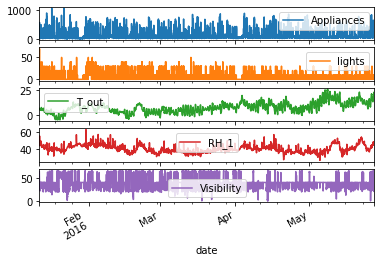

In [61]:
df.set_index('date')[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']].plot(subplots=True)

In [8]:
df_input=df[['Appliances', 'T_out', 'RH_1', 'Visibility']]
df_input

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [9]:
df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [12]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)
data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [16]:
features = data_scaled
target = data_scaled[:,0]
target

array([0.04672897, 0.04672897, 0.03738318, ..., 0.24299065, 0.38317757,
       0.39252336])

In [37]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

In [38]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, shuffle=False)

In [23]:
x_train.shape

(15788, 4)

In [24]:
x_test.shape

(3947, 4)

In [25]:
y_train.shape

(15788,)

In [26]:
y_test.shape

(3947,)

In [39]:
win_length=720
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [40]:
train_generator[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        

In [41]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True, input_shape=(win_length, num_features)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 720, 60)           15600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 720, 60)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [46]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')

In [48]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=[callbacks])

Epoch 1/10
471/471 [==============================] - 251s 527ms/step - loss: 0.0050 - mae: 0.0603 - val_loss: 0.0036 - val_mae: 0.0524
Epoch 2/10
471/471 [==============================] - 246s 522ms/step - loss: 0.0049 - mae: 0.0602 - val_loss: 0.0036 - val_mae: 0.0515
Epoch 3/10
471/471 [==============================] - 246s 523ms/step - loss: 0.0049 - mae: 0.0599 - val_loss: 0.0036 - val_mae: 0.0518
Epoch 4/10
471/471 [==============================] - 245s 520ms/step - loss: 0.0049 - mae: 0.0593 - val_loss: 0.0036 - val_mae: 0.0521
Epoch 5/10
471/471 [==============================] - 242s 515ms/step - loss: 0.0049 - mae: 0.0596 - val_loss: 0.0036 - val_mae: 0.0517
Epoch 6/10
471/471 [==============================] - 245s 520ms/step - loss: 0.0049 - mae: 0.0582 - val_loss: 0.0036 - val_mae: 0.0532
Epoch 7/10
471/471 [==============================] - 242s 515ms/step - loss: 0.0049 - mae: 0.0594 - val_loss: 0.0036 - val_mae: 0.0527


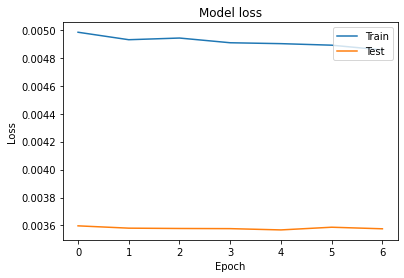

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

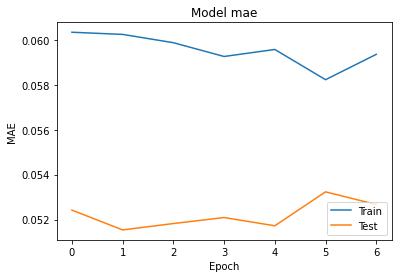

In [59]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()